In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *
from concurrent.futures import ThreadPoolExecutor

import subprocess
import pickle

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

trials = 5

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gcn_model.pth"
list_save_path = "../attacks/cora_gcn_edges_full_run.pth"
# list_save_path = "../attacks/cora_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.806
Initial Loss: 0.655889093875885


In [9]:
# G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.20)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = [], [], []
for _ in range(trials):
    acc, loss, itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)
    full_metattack_acc.append(acc)
    full_metattack_loss.append(loss)
    full_metattack_itrs.append(itrs)

Peturbing graph...:   0%|          | 0/26 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6063240766525269
Surrogate acc on unlabled data: 0.803
Attack loss: 0.2818821668624878
Surrogate loss on unlabled data: 0.7638267874717712
Surrogate acc on unlabled data: 0.768
Attack loss: 0.4332287907600403


Peturbing graph...:   0%|          | 0/26 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6075624823570251
Surrogate acc on unlabled data: 0.8
Attack loss: 0.300223708152771
Surrogate loss on unlabled data: 0.7340532541275024
Surrogate acc on unlabled data: 0.78
Attack loss: 0.42022013664245605


Peturbing graph...:   0%|          | 0/26 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.5808457136154175
Surrogate acc on unlabled data: 0.807
Attack loss: 0.2971305549144745
Surrogate loss on unlabled data: 0.7092568874359131
Surrogate acc on unlabled data: 0.782
Attack loss: 0.4146382510662079


Peturbing graph...:   0%|          | 0/26 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6077326536178589
Surrogate acc on unlabled data: 0.801
Attack loss: 0.28225094079971313
Surrogate loss on unlabled data: 0.7080211639404297
Surrogate acc on unlabled data: 0.772
Attack loss: 0.40747150778770447


In [11]:
full_metattack_loss[0][-13]

0.6787423491477966

In [12]:
full_metattack_loss[1][-13]

0.6577221155166626

In [13]:
edges_to_add

[(57, 2703),
 (4, 500),
 (79, 1164),
 (13, 1347),
 (44, 86),
 (131, 2505),
 (10, 101),
 (7, 2340),
 (82, 2697),
 (23, 2692),
 (115, 2409),
 (76, 2297),
 (4, 1591),
 (86, 1445),
 (50, 1938),
 (68, 2416),
 (68, 1390),
 (68, 585),
 (11, 322),
 (29, 2617),
 (27, 2411),
 (68, 1559),
 (37, 1629),
 (98, 2601),
 (62, 1295),
 (35, 411),
 (32, 2605),
 (69, 322),
 (34, 120),
 (34, 1828),
 (34, 130),
 (34, 1774),
 (131, 134),
 (68, 654),
 (68, 1643),
 (101, 177),
 (68, 1418),
 (62, 2612),
 (62, 2691),
 (34, 2672),
 (62, 848),
 (54, 2098),
 (62, 2643),
 (66, 2698),
 (71, 378),
 (28, 66),
 (10, 2169),
 (115, 1024),
 (19, 2603),
 (57, 237),
 (28, 2677),
 (62, 2571),
 (37, 2438),
 (98, 2559),
 (35, 2541),
 (131, 2545),
 (101, 187),
 (115, 273),
 (100, 1615),
 (136, 2545),
 (62, 422),
 (7, 2699),
 (63, 115),
 (63, 1446),
 (2584, 2631),
 (69, 2104),
 (28, 243),
 (28, 1446),
 (60, 2142),
 (3, 83),
 (32, 2658),
 (3, 25),
 (28, 1322),
 (39, 2625),
 (28, 1454),
 (63, 116),
 (34, 117),
 (82, 2568),
 (28, 101

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

# regular, secondary attack, not reversed

In [33]:


# for s in splits:
#     if s == 0.0:
#         for j in range(trials):
#             split_dic_acc[s][j] = full_metattack_acc[j]
#             split_dic_loss[s][j] = full_metattack_loss[j]
#             itrs_one[s][j] = full_metattack_itrs[j]
#     else:
#         processes = []
#         for j in range(trials):
#             cmd = [
#                 "python", "trial_worker.py",
#                 "--split", str(s),
#                 "--trial", str(j),
#                 "--ptb", str(ptb_rate),
#                 "--method", "greedy",
#                 "--constant", str(True),
#                 "--increasing", str(False),
#                 "--binary", str(False),
#                 "--decreasing", str(False),
#                 "--dataset", "Cora",
#                 "--model_path", model_save_path,
#                 "--list_path", list_save_path
#             ]
#             proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
#             processes.append((j, proc))

#         for j, proc in processes:
#             stdout, _ = proc.communicate()
#             print(stdout.decode().strip())
#             result = pickle.loads(bytes.fromhex(stdout.decode().strip()))
#             _, acc, loss, itrs = result
#             split_dic_acc[s][j] = acc
#             split_dic_loss[s][j] = loss
#             itrs_one[s][j] = itrs

In [16]:
# split_dic_acc

In [17]:
splits = [0.0, 0.5]

split_dic_acc = defaultdict(lambda: defaultdict(list))
split_dic_loss = defaultdict(lambda: defaultdict(list))
itrs_one = defaultdict(lambda: defaultdict(int))

In [16]:
# data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [18]:
for s in splits:
    for j in range(trials):
        if s == 0.0:
            split_dic_acc[s][j], split_dic_loss[s][j], itrs_one[s][j] = full_metattack_acc[j], full_metattack_loss[j], full_metattack_itrs[j]
        else:
            split_dic_acc[s][j], split_dic_loss[s][j], itrs_one[s][j] = two_phase_attack_greedy(data, train, model, s, edges_to_add, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.5961856245994568
Surrogate acc on unlabled data: 0.804
Attack loss: 0.2793295383453369
Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 17, Selected: 10


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6326912045478821
Surrogate acc on unlabled data: 0.802
Attack loss: 0.30446937680244446


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.594071626663208
Surrogate acc on unlabled data: 0.8130000000000001
Attack loss: 0.2697034180164337
Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 18, Selected: 10


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6461790204048157
Surrogate acc on unlabled data: 0.792
Attack loss: 0.30433809757232666


In [ ]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.NONE, Reverse.ATTACKED)
record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"constant"}_{"attacked"}_results.pkl')

In [31]:
split_dic_loss

defaultdict(<function __main__.<lambda>()>,
            {0.0: defaultdict(list,
                         {0: [0.655889093875885,
                           0.6540716290473938,
                           0.6539903283119202,
                           0.6599813103675842,
                           0.6615467071533203,
                           0.6700540781021118,
                           0.6732790470123291,
                           0.6742684841156006,
                           0.6790912747383118,
                           0.678171694278717,
                           0.6780312657356262,
                           0.6779945492744446,
                           0.6777286529541016,
                           0.6776903867721558,
                           0.6787423491477966,
                           0.6787419319152832,
                           0.681338369846344,
                           0.6813142895698547,
                           0.6812378168106079,
                           

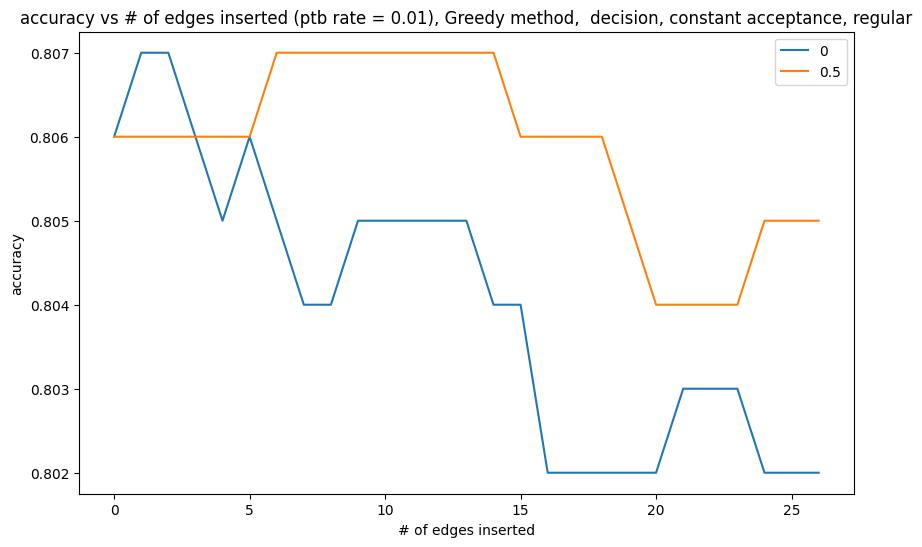

In [21]:
plot_results({0: split_dic_acc[0.0][0], 0.5: split_dic_acc[0.5][0]}, ptb_rate, "Greedy", "", "constant", "accuracy", "regular")

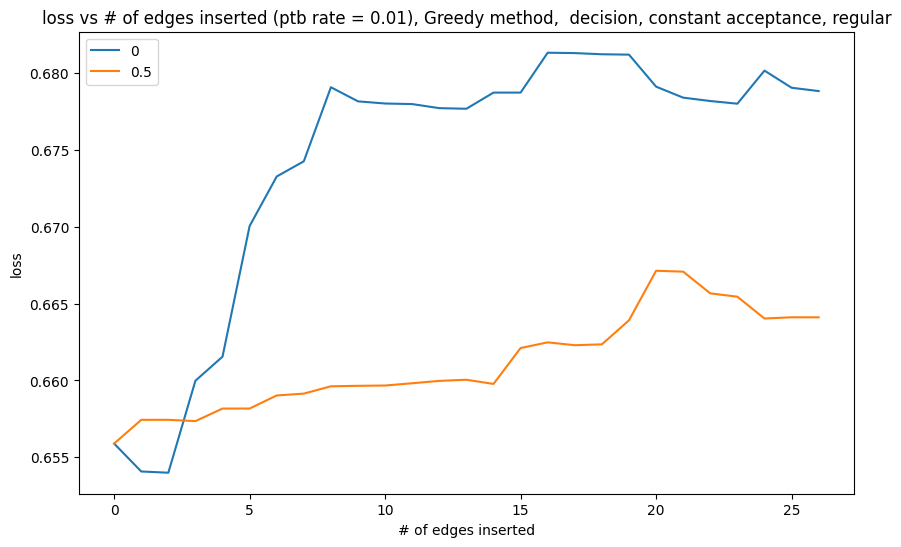

In [22]:
plot_results({0: split_dic_loss[0.0][0], 0.5: split_dic_loss[0.5][0]}, ptb_rate, "Greedy", "", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [24]:
split_dic_decreasing_acc = defaultdict(lambda: defaultdict(list))
itrs_two = defaultdict(lambda: defaultdict(int))
split_dic_decreasing_loss = defaultdict(lambda: defaultdict(list))

In [34]:
for s in splits:
    for j in range(trials):
        if s == 0.0:
            split_dic_decreasing_acc[s][j], split_dic_decreasing_loss[s][j], itrs_two[s][j] = full_metattack_acc[j], full_metattack_loss[j], full_metattack_itrs[j]
        else:
            split_dic_decreasing_acc[s][j], split_dic_decreasing_loss[s][j], itrs_two[s][j] = two_phase_attack_greedy(data, train, model, s, edges_to_add, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.5760909914970398
Surrogate acc on unlabled data: 0.8180000000000001
Attack loss: 0.28643327951431274
Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 18, Selected: 10


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6311655640602112
Surrogate acc on unlabled data: 0.8
Attack loss: 0.29669591784477234


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6051573753356934
Surrogate acc on unlabled data: 0.803
Attack loss: 0.2916332185268402
Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 20, Selected: 10


Peturbing graph...:   0%|          | 0/13 [00:00<?, ?it/s]

Surrogate loss on unlabled data: 0.6432487368583679
Surrogate acc on unlabled data: 0.797
Attack loss: 0.2900006175041199


In [35]:
split_dic_decreasing_loss

defaultdict(<function __main__.<lambda>()>,
            {0.0: defaultdict(list,
                         {0: [0.655889093875885,
                           0.6540716290473938,
                           0.6539903283119202,
                           0.6599813103675842,
                           0.6615467071533203,
                           0.6700540781021118,
                           0.6732790470123291,
                           0.6742684841156006,
                           0.6790912747383118,
                           0.678171694278717,
                           0.6780312657356262,
                           0.6779945492744446,
                           0.6777286529541016,
                           0.6776903867721558,
                           0.6787423491477966,
                           0.6787419319152832,
                           0.681338369846344,
                           0.6813142895698547,
                           0.6812378168106079,
                           

In [19]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.NONE, Reverse.ATTACKED)
record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"increasing"}_{"attacked"}_results.pkl')

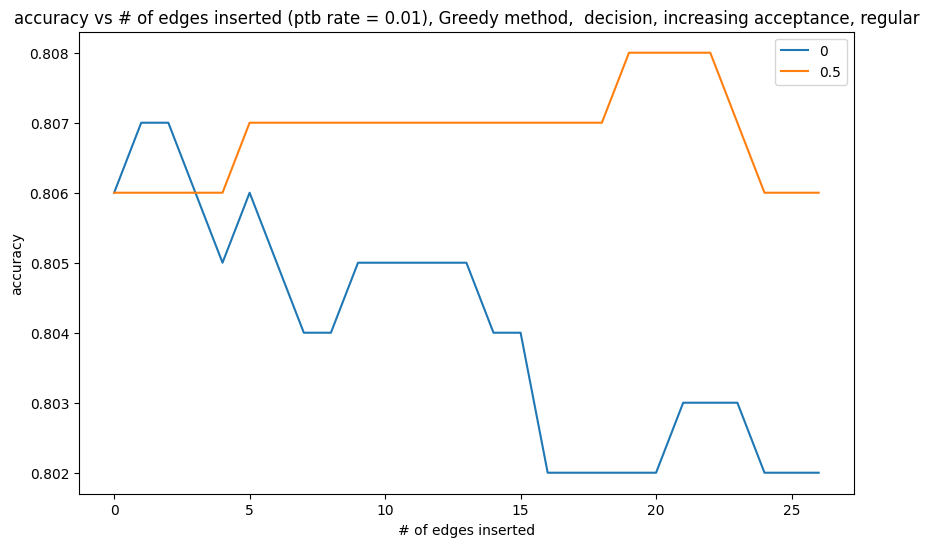

In [37]:
plot_results({0: split_dic_decreasing_acc[0.0][0], 0.5: split_dic_decreasing_acc[0.5][0]}, ptb_rate, "Greedy", "", "increasing", "accuracy", "regular")

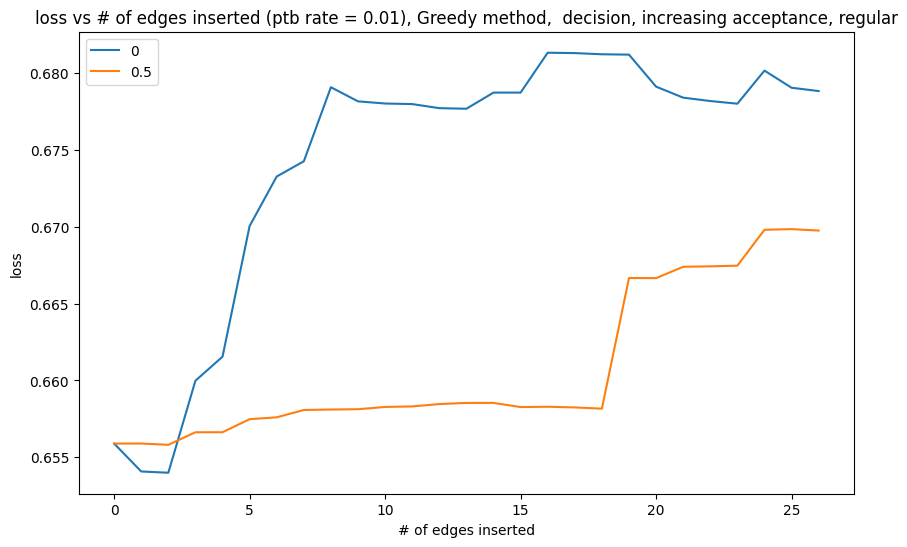

In [38]:
plot_results({0: split_dic_decreasing_loss[0.0][0], 0.5: split_dic_decreasing_loss[0.5][0]}, ptb_rate, "Greedy", "", "increasing", "loss", "regular")